In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert the BGR image to RGB
    image.flags.writeable = False                   # Image is no longer writeable
    results = model.process(image)                  # Make prediction
    image.flags.writeable = True                    # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert back to BGR
    return image, results

In [3]:
import cv2
import mediapipe as mp

# Initialize mediapipe holistic model
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert the BGR image to RGB
    image.flags.writeable = False                   # Image is no longer writeable
    results = model.process(image)                  # Make prediction
    image.flags.writeable = True                    # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert back to BGR
    return image, results

def draw_landmarks(image, results):
    # Draw face connections
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.face_landmarks, 
            mp.solutions.face_mesh.FACEMESH_TESSELATION, 
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )
    
    # Draw pose connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.pose_landmarks, 
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )
    
    # Draw left hand connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )

    # Draw right hand connections
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )

# Initialize video capture
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

# Set up the mediapipe holistic model with desired confidence levels
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read frame from the video feed
        ret, frame = cap.read()

        if not ret:
            print("Error: Failed to capture image.")
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)

        # Display the frame with landmarks
        cv2.imshow('MediaPipe Feed', image)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # Release the video capture object and close display window
    cap.release()
    cv2.destroyAllWindows()

Webcam opened successfully.


C:\Users\senth\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [4]:
results.right_hand_landmarks

landmark {
  x: 0.186034799
  y: 0.464001089
  z: 3.53086051e-007
}
landmark {
  x: 0.234159097
  y: 0.447771728
  z: -0.0202238932
}
landmark {
  x: 0.277749628
  y: 0.416864872
  z: -0.0303206984
}
landmark {
  x: 0.315216213
  y: 0.390776306
  z: -0.0396328829
}
landmark {
  x: 0.344938815
  y: 0.375228763
  z: -0.0487995148
}
landmark {
  x: 0.257102907
  y: 0.319195837
  z: -0.0142333535
}
landmark {
  x: 0.279646039
  y: 0.261124313
  z: -0.026673831
}
landmark {
  x: 0.289745241
  y: 0.224625334
  z: -0.0381441526
}
landmark {
  x: 0.296899587
  y: 0.191108838
  z: -0.0469925031
}
landmark {
  x: 0.228738353
  y: 0.302921295
  z: -0.0151028074
}
landmark {
  x: 0.241271704
  y: 0.232991785
  z: -0.025956165
}
landmark {
  x: 0.246377736
  y: 0.188096091
  z: -0.0373848602
}
landmark {
  x: 0.248238474
  y: 0.150396928
  z: -0.0461660549
}
landmark {
  x: 0.199595645
  y: 0.302013487
  z: -0.0187009294
}
landmark {
  x: 0.204380482
  y: 0.235464662
  z: -0.0306106117
}
landmark {

In [5]:
results.left_hand_landmarks

landmark {
  x: 0.78503722
  y: 0.429783762
  z: 2.90090526e-007
}
landmark {
  x: 0.739444911
  y: 0.412042856
  z: -0.0171287246
}
landmark {
  x: 0.700877845
  y: 0.380117893
  z: -0.0255881846
}
landmark {
  x: 0.669322133
  y: 0.35396418
  z: -0.033148203
}
landmark {
  x: 0.64473021
  y: 0.332224339
  z: -0.0401214547
}
landmark {
  x: 0.7262519
  y: 0.293241501
  z: -0.00894306693
}
landmark {
  x: 0.709334731
  y: 0.236806035
  z: -0.019482851
}
landmark {
  x: 0.700792849
  y: 0.202013254
  z: -0.0292261783
}
landmark {
  x: 0.695710421
  y: 0.172657073
  z: -0.036538396
}
landmark {
  x: 0.752634883
  y: 0.281493604
  z: -0.0100811189
}
landmark {
  x: 0.743563831
  y: 0.217593759
  z: -0.0180349294
}
landmark {
  x: 0.738530815
  y: 0.178332046
  z: -0.0261964146
}
landmark {
  x: 0.735404
  y: 0.146253973
  z: -0.0324270763
}
landmark {
  x: 0.779738426
  y: 0.282182395
  z: -0.0143541908
}
landmark {
  x: 0.778539538
  y: 0.221602321
  z: -0.0250641853
}
landmark {
  x: 0.

In [6]:
len(results.left_hand_landmarks.landmark)

21

In [7]:
len(results.right_hand_landmarks.landmark)

21

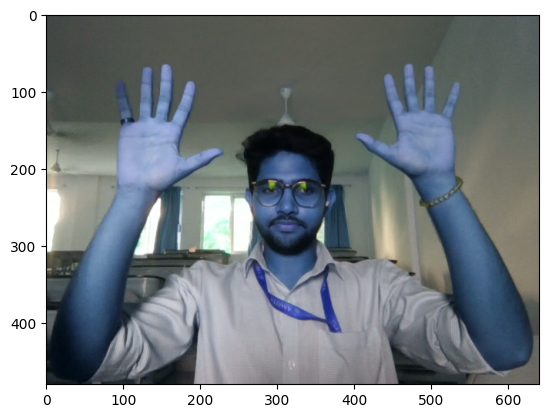

In [8]:
plt.imshow(frame)

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame, results)

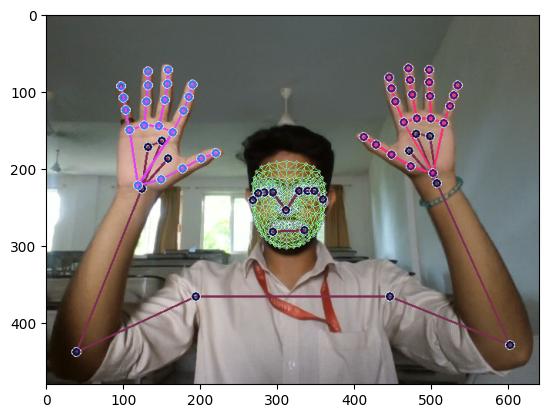

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
face = (
    np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
    if results.face_landmarks
    else np.zeros(1404)
)


In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)
extract_keypoints(results).shape
result_test

array([ 0.48710203,  0.53015685, -0.97530353, ...,  0.15288891,
        0.1941558 , -0.04638279])

In [17]:
DATA_PATH = os.path.join('MP_Data3') 

# Actions that we try to detect
actions = np.array([
'see you later',
    'how are you','i am fine','nice to meet you','how can i help you','what is your name','TAKE CARE','where are you from','i do not understand','can you repeat','do you understand'])
no_sequences = 30
sequence_length = 30


In [20]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [19]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(5) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [22]:
label_map = {label:num for num, label in enumerate(actions)}

In [23]:
label_map

{'see you later': 0,
 'how are you': 1,
 'i am fine': 2,
 'nice to meet you': 3,
 'how can i help you': 4,
 'what is your name': 5,
 'TAKE CARE': 6,
 'where are you from': 7,
 'i do not understand': 8,
 'can you repeat': 9,
 'do you understand': 10}

In [24]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [25]:
np.array(sequences).shape
np.array(labels).shape
X = np.array(sequences)
X.shape
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
y_test.shape

(17, 11)

In [26]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

NameError: name 'TensorBoard' is not defined

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
model = Sequential()

# Add SimpleRNN layers instead of LSTM layers
model.add(SimpleRNN(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(SimpleRNN(128, return_sequences=True, activation='relu'))
model.add(SimpleRNN(64, return_sequences=False, activation='relu'))

# Add Dense layers for classification
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

C:\Users\senth\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import TensorBoard
import numpy as np

# Initialize the model
model = Sequential()

# Add SimpleRNN layers instead of LSTM layers
model.add(SimpleRNN(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(SimpleRNN(128, return_sequences=True, activation='relu'))
model.add(SimpleRNN(64, return_sequences=False, activation='relu'))

# Add Dense layers for classification
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Initialize TensorBoard callback for logging
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

# Train the model
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

# Evaluate the model
res = model.predict(X_test)
model.save('action_rnn1.h5')

# Load and use the trained model
model.load_weights('action_rnn1.h5')

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

# Print evaluation metrics
print(multilabel_confusion_matrix(ytrue, yhat))
print("Accuracy:", accuracy_score(ytrue, yhat))


C:\Users\senth\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - categorical_accuracy: 0.0683 - loss: 2.4370
Epoch 2/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - categorical_accuracy: 0.1115 - loss: 2.4368
Epoch 3/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - categorical_accuracy: 0.1319 - loss: 2.3830
Epoch 4/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - categorical_accuracy: 0.1409 - loss: 2.3430
Epoch 5/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - categorical_accuracy: 0.1927 - loss: 2.2131
Epoch 6/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - categorical_accuracy: 0.1928 - loss: 2.1380
Epoch 7/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - categorical_accuracy: 0.2044 - loss: 2.0995
Epoch 8/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - categorical_accuracy: 0.2385 - loss: 1.9378
Epoch 9/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - categorical_accuracy: 0.2289 - loss: 1.8620
Epoch 10/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.3213 - loss: 1.7545
Epoch 11/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[[12  0]
  [ 0  5]]

 [[15  0]
  [ 0  2]]

 [[15  0]
  [ 1  1]]

 [[13  1]
  [ 0  3]]

 [[15  0]
  [ 0  2]]

 [[15  0]
  [ 0  2]]

 [[16  0]
  [ 0  1]]]
Accuracy: 0.9411764705882353


In [23]:
model.predict(np.expand_dims(X_test[0], axis=0))
res = [0.7, 0.1, 0.05, 0.05, 0.05, 0.05]

NameError: name 'X_test' is not defined

In [25]:
res = [0.7, 0.1, 0.05, 0.05, 0.05, 0.05]

In [26]:
actions[np.argmax(res)]

'see you later'

In [27]:
model.predict(np.expand_dims(X_test[0], axis=0))

NameError: name 'X_test' is not defined

In [28]:
model.load_weights('action_rnn1.h5')

In [29]:
colors = [(245,117,16), (117,245,16), (16,117,245),(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [30]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

C:\Users\senth\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

IndexError: list index out of range

In [ ]:
model.summary()
res=model.predict(X_test)

In [ ]:
actions[np.argmax(res[4])]
actions[np.argmax(y_test[4])]

In [24]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

IndexError: list index out of range

In [42]:
import numpy as np
import cv2

colors = [
    (245, 117, 16),  # Color for action1
    (117, 245, 16),  # Color for action2
    (16, 117, 245),  # Color for action3
    (255, 0, 0),     # Color for action4
    (0, 255, 0),     # Color for action5
    (0, 0, 255)      # Color for action6
]

# Visualization function
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

# Example usage
res = [0.7, 0.1, 0.05, 0.05, 0.05, 0.05]  # Replace with actual model predictions
image = np.zeros((480, 640, 3), dtype=np.uint8)  # Dummy image for visualization

# Call the visualization function
image = prob_viz(res, actions, image, colors)

# Display the result
cv2.imshow('Probabilities Visualization', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
